Week 1 - Introduction
Liverpool is ranked at No. 6 on the list of the most visited UK cities. It is noted for its culture, architecture, and transport links. The city is closely associated with the arts, especially music; the popularity of the Beatles, widely regarded as the most influential musical act in history, contributed to the city's status as a tourist destination.
Week 1 - Business oportunity
As a stakeholder where would it be a good place to open a profitable restaurant in Liverpool.
    

Import necessary libraries

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab
usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


Use Beautiful Soap to scrape data from Wikipedia

In [3]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Areas_of_Liverpool').text 
soup = BeautifulSoup(source, 'lxml')

In [ ]:
Write to csv

In [4]:
csv_file = open('liverpool.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [5]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [6]:
csv_file.close()

In [7]:
liverpool_raw = pd.read_csv('liverpool.csv')

In [ ]:
How many areas surrounding Liverpool

In [8]:
liverpool_raw.shape

(38, 1)

In [9]:
liverpool_raw

,Neighbourhood
0,"Belle Vale, Liverpool"
1,Broadgreen
2,"Canning, Liverpool"
3,Childwall
4,"Chinatown, Liverpool"
5,Liverpool city centre
6,Clubmoor
7,Croxteth
8,"Dingle, Liverpool"
9,"Dovecot, Liverpool"


Get lat and long

In [10]:

# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = liverpool_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, liverpool, UK'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [11]:
pool_data = liverpool_raw
pool_data['Latitude'] = lat
pool_data['Longitude'] = lng

In [13]:
pool_data.head()

,Neighbourhood,Latitude,Longitude
0,"Belle Vale, Liverpool",53.385103,-2.857564
1,Broadgreen,53.408200,-2.897280
2,"Canning, Liverpool",53.397890,-2.966440
3,Childwall,53.395810,-2.889250
4,"Chinatown, Liverpool",53.399960,-2.976190


In [ ]:
Use Foursquare

In [14]:
CLIENT_ID = 'J0SG155T0YUMO20UJO52NXZFM5YGIMCV4CMFRVGG5RSSPTWY' # your Foursquare ID
CLIENT_SECRET = 'WPZQ5HQOLOENXDGXH0SUKLMARMDOAAR4UKIE2MQX1TYD0UNA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J0SG155T0YUMO20UJO52NXZFM5YGIMCV4CMFRVGG5RSSPTWY
CLIENT_SECRET:WPZQ5HQOLOENXDGXH0SUKLMARMDOAAR4UKIE2MQX1TYD0UNA


In [15]:
from geopy.geocoders import Nominatim

address = 'Liverpool, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Liverpool are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Liverpool are 53.407154, -2.991665.


In [19]:
pool_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(pool_data['Latitude'], pool_data['Longitude'], pool_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(pool_map)  
    
pool_map

In [20]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Get venues from Foursquare

In [21]:
explore_df_list = []

for i, nhood_name in enumerate(pool_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = pool_data.loc[i, 'Neighbourhood']
        nhood_lat = pool_data.loc[i, 'Latitude']
        nhood_lng = pool_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)
         # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

<ipython-input-21-1f72c37bfbaa>:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby = json_normalize(results) # Flatten JSON


In [22]:
explore_pool = pd.DataFrame([item for item in explore_df_list])
explore_pool.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_pool.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,"Belle Vale, Liverpool",53.385103,-2.857564,Black Bull,Pub,53.383506,-2.862693
1,"Belle Vale, Liverpool",53.385103,-2.857564,Bear & Staff,Pub,53.382802,-2.863866
2,"Belle Vale, Liverpool",53.385103,-2.857564,Home Bargains,Discount Store,53.391085,-2.859432
3,"Belle Vale, Liverpool",53.385103,-2.857564,KFC,Fast Food Restaurant,53.390432,-2.859895
4,"Belle Vale, Liverpool",53.385103,-2.857564,Subway,Sandwich Place,53.390668,-2.860066


In [23]:
pool_1hot = pd.get_dummies(explore_pool[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
pool_1hot['Neighbourhood'] = explore_pool['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [pool_1hot.columns[-1]] + pool_1hot.columns[:-1].values.tolist()
pool_1hot = pool_1hot[fixed_columns]

pool_1hot.head(10)

,Neighbourhood,Airport Service,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,English Restaurant,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Go Kart Track,Golf Driving Range,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hostel,Hotel,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Lake,Liquor Store,Lounge,Malay Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Movie Theater,Museum,Music Venue,Optical Shop,Outdoor Sculpture,Park,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Pool,Pub,Restaurant,Road,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Souvenir Shop,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Warehouse Store,Waterfront,Wine Bar,Yoga Studio
0,"Belle Vale, Liverpool",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Belle Vale, Liverpool",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Belle Vale, Liverpool",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Belle Vale, Liverpool",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Belle Vale, Liverpool",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,"Belle Vale, Liverpool",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,"Belle Vale, Liverpool",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,"Belle Vale, Liverpool",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,"Belle Vale, Liverpool",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [24]:
pool_grouped = pool_1hot.groupby('Neighbourhood').mean().reset_index()
pool_grouped.head()

,Neighbourhood,Airport Service,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,English Restaurant,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Go Kart Track,Golf Driving Range,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hostel,Hotel,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Lake,Liquor Store,Lounge,Malay Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Movie Theater,Museum,Music Venue,Optical Shop,Outdoor Sculpture,Park,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Pool,Pub,Restaurant,Road,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Souvenir Shop,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Warehouse Store,Waterfront,Wine Bar,Yoga Studio
0,"Belle Vale, Liverpool",0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.058824,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.058824,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.058824,0.0,0.0,0.176471,0.0,0.0,0.000000,0.0,0.0,0.0,0.058824,0.058824,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.058824,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.000000,0.0,0.0,0.000000,0.058824,0.0,0.058824,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.058824,0.0,0.0,0.0,0.000000,0.0,0.058824,0.000000,0.000000,0.000000,0.058824,0.0,0.0,0.0
1,Broadgreen,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.083333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.000000,0.0,0.0,0.000000,0.083333,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.083333,0.0,0.0,0.0,0.000000,0.0,0.000000,0.083333,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,"Canning, Liverpool",0.0,0.033333,0.0,0.0,0.0,0.0,0.033333,0.000000,0.1,0.000000,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.100000,0.0,0.0,0.000000,0.033333,0.0,0.000000,0.033333,0.100000,0.0,0.0,0.000000,0.033333,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.033333,0.033333,0.033333,0.000000,0.000000,0.066667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.100000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.033333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,

In [25]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [27]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = pool_grouped['Neighbourhood']

for ind in np.arange(pool_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(pool_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head(10)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Belle Vale, Liverpool",Fast Food Restaurant,Pub,Garden Center,Sandwich Place,Indoor Play Area,Supermarket,Discount Store,Bakery,Shopping Mall,Gas Station
1,Broadgreen,Pub,Bus Stop,Supermarket,Grocery Store,Pet Store,Train Station,Indian Restaurant,Sandwich Place,Intersection,Yoga Studio
2,"Canning, Liverpool",Coffee Shop,Pub,Restaurant,Café,Bar,Italian Restaurant,Bistro,Modern European Restaurant,Church,Spanish Restaurant
3,Childwall,Café,Pub,Gym / Fitness Center,Convenience Store,Steakhouse,Salon / Barbershop,Chinese Restaurant,Hotel,Park,Grocery Store
4,"Chinatown, Liverpool",Bar,Coffee Shop,Restaurant,Pub,Café,Church,Food & Drink Shop,Italian Restaurant,Indie Movie Theater,Spanish Restaurant
5,Clubmoor,Fast Food Restaurant,Warehouse Store,Pub,Furniture / Home Store,Supermarket,Discount Store,Department Store,English Restaurant,Donut Shop,Diner
6,Croxteth,Pub,Shopping Plaza,Discount Store,Bus Station,Yoga Studio,College Football Field,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store
7,"Dingle, Liverpool",Grocery Store,Gym,Pub,Restaurant,Pizza Place,Hotel,Construction & Landscaping,Café,Discount Store,Sandwich Place
8,"Dovecot, Liverpool",Fast Food Restaurant,Auto Garage,Liquor Store,Supermarket,Yoga Studio,Pharmacy,Grocery Store,Photography Studio,Concert Hall,Construction & Landscaping
9,"Edge Hill, Liverpool",Discount Store,Grocery Store,Hotel,Fast Food Restaurant,American Restaurant,Asian Restaurant,Pizza Place,Park,History Museum,Gym / Fitness Center


In [28]:
pool_grouped_clustering = pool_grouped.drop('Neighbourhood', 1)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [33]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for pool_clusters in range(2, max_range) :
    
    # Run k-means clustering
    pool_gc = pool_grouped_clustering
    kmeans = KMeans(n_clusters = pool_clusters, init = 'k-means++', random_state = 0).fit_predict(pool_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(pool_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(pool_clusters)
    scores.append(score)

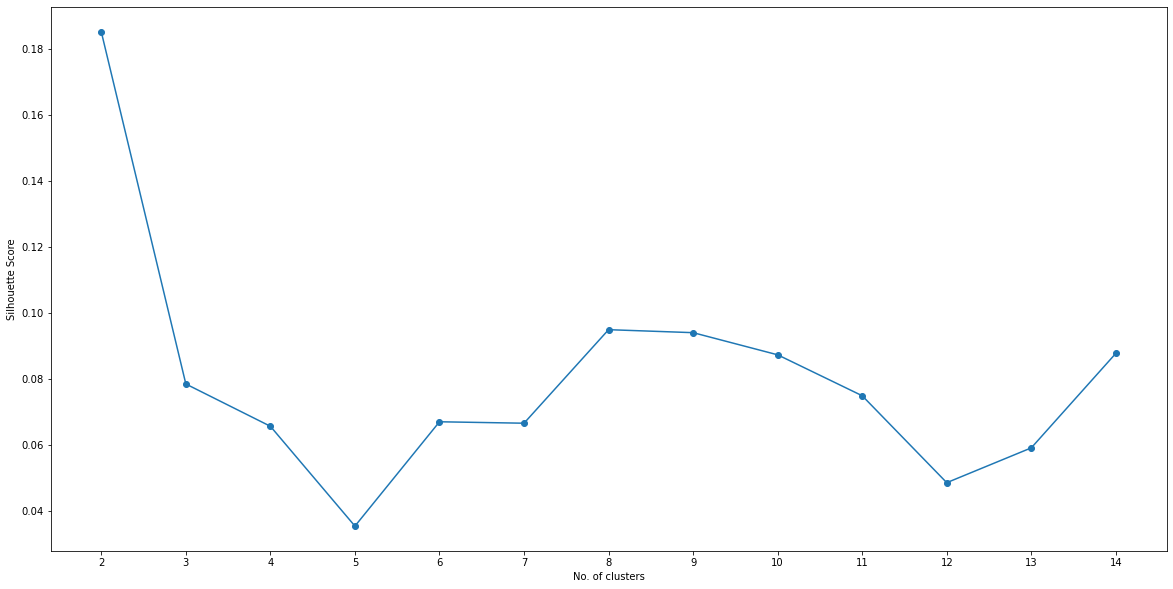

In [34]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [58]:
opt_value = 8

In [59]:
pool_clusters = opt_value

# Run k-means clustering
pool_gc = pool_grouped_clustering
kmeans = KMeans(n_clusters = pool_clusters, init = 'k-means++', random_state = 0).fit(pool_gc)

In [60]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [38]:
pool_final = pool_data
pool_final = pool_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
pool_final.dropna(inplace = True)
pool_final['Cluster Labels'] = pool_final['Cluster Labels'].astype(int)
pool_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Belle Vale, Liverpool",53.385103,-2.857564,2,Fast Food Restaurant,Pub,Garden Center,Sandwich Place,Indoor Play Area,Supermarket,Discount Store,Bakery,Shopping Mall,Gas Station
1,Broadgreen,53.408200,-2.897280,0,Pub,Bus Stop,Supermarket,Grocery Store,Pet Store,Train Station,Indian Restaurant,Sandwich Place,Intersection,Yoga Studio
2,"Canning, Liverpool",53.397890,-2.966440,0,Coffee Shop,Pub,Restaurant,Café,Bar,Italian Restaurant,Bistro,Modern European Restaurant,Church,Spanish Restaurant
3,Childwall,53.395810,-2.889250,0,Café,Pub,Gym / Fitness Center,Convenience Store,Steakhouse,Salon / Barbershop,Chinese Restaurant,Hotel,Park,Grocery Store
4,"Chinatown, Liverpool",53.399960,-2.976190,0,Bar,Coffee Shop,Restaurant,Pub,Café,Church,Food & Drink Shop,Italian Restaurant,Indie Movie Theater,Spanish Restaurant


In [39]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(pool_clusters)
ys = [i + x + (i*x)**2 for i in range(pool_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(pool_final['Latitude'], pool_final['Longitude'], pool_final['Neighbourhood'], 
                                  pool_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [40]:
val = 1
pool_final.loc[pool_final['Cluster Labels'] == (val - 1), pool_final.columns[[0] + np.arange(4, pool_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Broadgreen,Pub,Bus Stop,Supermarket,Grocery Store,Pet Store,Train Station,Indian Restaurant,Sandwich Place,Intersection,Yoga Studio
2,"Canning, Liverpool",Coffee Shop,Pub,Restaurant,Café,Bar,Italian Restaurant,Bistro,Modern European Restaurant,Church,Spanish Restaurant
3,Childwall,Café,Pub,Gym / Fitness Center,Convenience Store,Steakhouse,Salon / Barbershop,Chinese Restaurant,Hotel,Park,Grocery Store
4,"Chinatown, Liverpool",Bar,Coffee Shop,Restaurant,Pub,Café,Church,Food & Drink Shop,Italian Restaurant,Indie Movie Theater,Spanish Restaurant
5,Liverpool city centre,Hotel,Coffee Shop,Café,History Museum,Italian Restaurant,Waterfront,Sandwich Place,Shopping Mall,Japanese Restaurant,Burger Joint
8,"Dingle, Liverpool",Grocery Store,Gym,Pub,Restaurant,Pizza Place,Hotel,Construction & Landscaping,Café,Discount Store,Sandwich Place
11,"Everton, Liverpool",Pub,Soccer Stadium,Sporting Goods Shop,Discount Store,Outdoor Sculpture,Pizza Place,Hotel,Warehouse Store,Restaurant,Coffee Shop
14,"Garston, Liverpool",Café,Pub,Coffee Shop,Hotel,Gym,Sporting Goods Shop,Concert Hall,Pizza Place,Department Store,Rock Club
20,"Kirkdale, Liverpool",Pub,Outdoor Sculpture,Fast Food Restaurant,Discount Store,Park,Museum,Climbing Gym,College Football Field,Chinese Restaurant,Restaurant
22,Mossley Hill,Coffee Shop,Grocery Store,Pub,Historic Site,Bookstore,Optical Shop,Pharmacy,Pizza Place,Mexican Restaurant,Chinese Restaurant


In [41]:
val = 2
pool_final.loc[pool_final['Cluster Labels'] == (val - 1), pool_final.columns[[0] + np.arange(4, pool_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,"Netherley, Liverpool",Construction & Landscaping,Golf Driving Range,Cheese Shop,Gas Station,Yoga Studio,Fish & Chips Shop,Comic Shop,Concert Hall,Convenience Store,Deli / Bodega


In [42]:
val = 3
pool_final.loc[pool_final['Cluster Labels'] == (val - 1), pool_final.columns[[0] + np.arange(4, pool_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Belle Vale, Liverpool",Fast Food Restaurant,Pub,Garden Center,Sandwich Place,Indoor Play Area,Supermarket,Discount Store,Bakery,Shopping Mall,Gas Station
6,Clubmoor,Fast Food Restaurant,Warehouse Store,Pub,Furniture / Home Store,Supermarket,Discount Store,Department Store,English Restaurant,Donut Shop,Diner
15,Gateacre,Pub,Fast Food Restaurant,Optical Shop,Shopping Mall,Sandwich Place,Park,Café,Indoor Play Area,Supermarket,Warehouse Store
16,Gillmoss,Fast Food Restaurant,Pub,Hotel,Discount Store,Movie Theater,Yoga Studio,Fish & Chips Shop,Comic Shop,Concert Hall,Construction & Landscaping


In [43]:
val = 4
pool_final.loc[pool_final['Cluster Labels'] == (val - 1), pool_final.columns[[0] + np.arange(4, pool_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Croxteth,Pub,Shopping Plaza,Discount Store,Bus Station,Yoga Studio,College Football Field,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store


In [44]:
val = 5
pool_final.loc[pool_final['Cluster Labels'] == (val - 1), pool_final.columns[[0] + np.arange(4, pool_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Norris Green,Discount Store,Warehouse Store,Pharmacy,Park,Yoga Studio,Fish & Chips Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store


In [45]:
val = 6
pool_final.loc[pool_final['Cluster Labels'] == (val - 1), pool_final.columns[[0] + np.arange(4, pool_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Fazakerley,Construction & Landscaping,Sandwich Place,Grocery Store,Supermarket,Convenience Store,Department Store,English Restaurant,Donut Shop,Discount Store,Diner


In [46]:
val = 7
pool_final.loc[pool_final['Cluster Labels'] == (val - 1), pool_final.columns[[0] + np.arange(4, pool_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Speke,Airport Service,Café,Pub,Clothing Store,Supermarket,English Restaurant,Donut Shop,Discount Store,Diner,Deli / Bodega


In [47]:
val = 8
pool_final.loc[pool_final['Cluster Labels'] == (val - 1), pool_final.columns[[0] + np.arange(4, pool_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,"Dovecot, Liverpool",Fast Food Restaurant,Auto Garage,Liquor Store,Supermarket,Yoga Studio,Pharmacy,Grocery Store,Photography Studio,Concert Hall,Construction & Landscaping
10,"Edge Hill, Liverpool",Discount Store,Grocery Store,Hotel,Fast Food Restaurant,American Restaurant,Asian Restaurant,Pizza Place,Park,History Museum,Gym / Fitness Center
12,"Fairfield, Liverpool",Fast Food Restaurant,Supermarket,Park,Hotel,Discount Store,Pet Store,Sandwich Place,Deli / Bodega,Bus Stop,Pub
17,Grassendale,Platform,Supermarket,Pool,Train Station,Café,Furniture / Home Store,Coffee Shop,General Entertainment,Gastropub,College Football Field
18,Hunt's Cross,Fast Food Restaurant,Sandwich Place,Furniture / Home Store,Pizza Place,Supermarket,Grocery Store,Platform,Gym / Fitness Center,Train Station,Indian Restaurant
19,"Kensington, Liverpool",Grocery Store,Discount Store,Park,Hotel,Bakery,Fast Food Restaurant,Sandwich Place,Deli / Bodega,Supermarket,Pub
21,Knotty Ash,Supermarket,Fast Food Restaurant,Sandwich Place,Pizza Place,Park,Auto Garage,Chinese Restaurant,Department Store,Donut Shop,Discount Store
25,Old Swan,Supermarket,Coffee Shop,Grocery Store,Pub,Sandwich Place,Fast Food Restaurant,Clothing Store,Bowling Alley,Pharmacy,Mexican Restaurant
26,Orrell Park,Pizza Place,Gym / Fitness Center,Pub,Pharmacy,Sandwich Place,Supermarket,Soccer Stadium,Discount Store,Train Station,Park
32,Tuebrook,Supermarket,Park,Grocery Store,Pub,Sandwich Place,Fast Food Restaurant,Sports Club,Steakhouse,Pet Store,Gym Pool
